<a href="https://colab.research.google.com/github/utharaprince/YouTubead/blob/main/YouTubead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAIN**

In [ ]:
pip install joblib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
Youtube=pd.read_csv("train.csv")
Youtube.head(100)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
95,VID_5048,1,1208415,2082,202,120,2010-11-10,PT2M41S,D
96,VID_16781,1,5993,11,2,1,2015-09-21,PT40S,E
97,VID_10543,6,1908671,675,448,71,2016-09-13,PT1M55S,D
98,VID_21411,124,609442,6698,349,724,2016-01-31,PT4M11S,G


In [ ]:
shape=Youtube.shape
shape

(14999, 9)

In [ ]:
cat={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
Youtube["category"]=Youtube["category"].map(cat)
Youtube

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
Youtube=Youtube[Youtube.likes!='F']
Youtube=Youtube[Youtube.views!='F']
Youtube=Youtube[Youtube.dislikes!='F']
Youtube=Youtube[Youtube.comment!='F']
Youtube

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
Youtube['adview']=pd.to_numeric(Youtube['adview'])
Youtube['likes']=pd.to_numeric(Youtube['likes'])
Youtube['dislikes']=pd.to_numeric(Youtube['dislikes'])
Youtube['comment']=pd.to_numeric(Youtube['comment'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
Youtube['vidid']=LabelEncoder().fit_transform(Youtube['vidid'])
Youtube['published']=LabelEncoder().fit_transform(Youtube['published'])
Youtube['duration']=LabelEncoder().fit_transform(Youtube['duration'])
Youtube

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,2833,1
14995,11758,1,665673,3849,156,569,1838,2257,4
14996,13263,4,3479,16,1,1,1053,2210,2
14997,6736,1,963,0,0,0,222,1364,7


In [ ]:
import datetime
import time
def checki(x):
      y = x[2:]  
      h = '' 
      m = '' 
      s = ''  
      mm = '' 
      P = ['H','M','S']    
      for i in y:      
          if i not in P:      
              mm+=i   
          else:         
              if (i=="H"):  
                h = mm         
                mm = '' 
              elif (i == "M"):    
                m = mm 
                mm = '' 
              else:    
                s = mm  
                mm = ''
      if  (h==''): 
              h = '00'  
      if (m == ''):      
              m = '00'  
      if (s==''):        
            s='00'   
      bp = h+':'+m+':'+s  
      return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time  = mp.apply(checki)
def func_sec(time_string):  
      h, m, s = time_string.split(':')   
      return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
Youtube["duration"]=time1
Youtube

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,370,1
14995,11758,1,665673,3849,156,569,1838,236,4
14996,13263,4,3479,16,1,1,1053,193,2
14997,6736,1,963,0,0,0,222,26,7


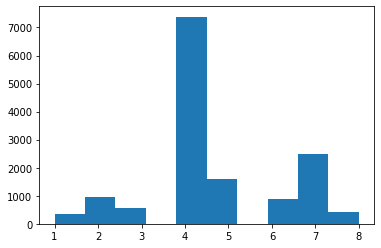

In [ ]:
plt.hist(Youtube["category"])
plt.show()

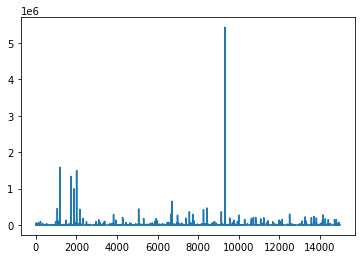

In [ ]:
plt.plot(Youtube["adview"])
plt.show()

In [ ]:
Youtube=Youtube[Youtube["adview"]<2000000]
Youtube

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,370,1
14995,11758,1,665673,3849,156,569,1838,236,4
14996,13263,4,3479,16,1,1,1053,193,2
14997,6736,1,963,0,0,0,222,26,7


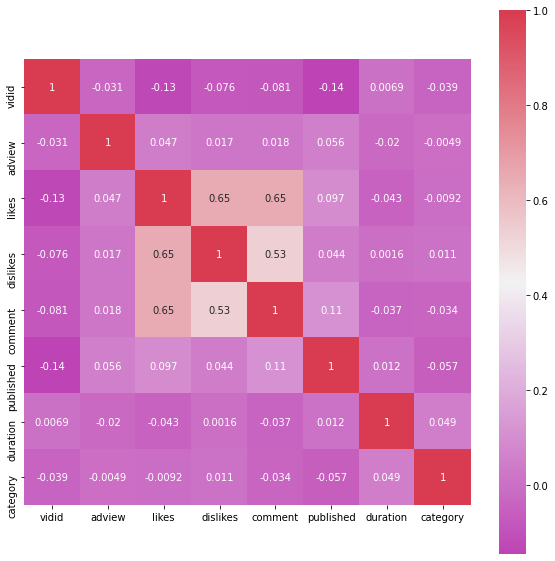

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
corr=Youtube.corr()
sns.heatmap(corr,square=True, annot=True, ax=ax, cmap=sns.diverging_palette(312,8, as_cmap=True))

In [ ]:
Y_train=pd.DataFrame(data=Youtube.iloc[:,1].values)
Y_train
#Youtube.head()

,0
0,40
1,2
2,1
3,6
4,1
...,...
14631,2
14632,1
14633,4
14634,1


In [ ]:
Youtube=Youtube.drop(["adview"], axis=1)


In [ ]:
Youtube=Youtube.drop(["vidid"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Youtube,Y_train,test_size=0.2,random_state=42)
x_train.shape
#x_train.describe()

(11708, 7)

In [ ]:
x_test.shape

(2928, 7)

In [ ]:
y_train

,0
13119,39
9293,4
2937,18782
1839,2
11099,20
...,...
5191,21127
13418,1
5390,1
860,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scale=MinMaxScaler()
x_train=Scale.fit_transform(x_train)
x_test=Scale.fit_transform(x_test)
x_train.mean()

0.1739096800320488

In [ ]:
from sklearn import metrics
def error(x_test,y_test,model_name):
  predict=model_name.predict(x_test)
  print("MAE:",metrics.mean_absolute_error(y_test,predict))
  print("MSE",metrics.mean_squared_error(y_test,predict))
  print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predict)))

In [ ]:
#DECISION TREES
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)
error(x_test,y_test,dec_tree)

MAE: 2700.8924180327867
MSE 891612967.4012978
RMSE: 29859.88893819429


In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(x_train,y_train)
error(x_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE: 3287.1644299703594
MSE 683129894.1481419
RMSE: 26136.75370332249


In [ ]:
#LINEAR REGRESSION
from sklearn import linear_model
linear_reg=linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
error(x_test,y_test,linear_reg)

MAE: 3707.378005824532
MSE 835663131.1210337
RMSE: 28907.83857573986


In [ ]:
#Neural Network

import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=x_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["MSE"])

history=ann.fit(x_train,y_train,epochs=100)

ann.summary()
error(x_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 14s 1ms/step - loss: 1475155907.9254 - MSE: 1475155907.9254
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 521040245.3090 - MSE: 521040245.3090
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 903110234.1580 - MSE: 903110234.1580
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 527274974.6310 - MSE: 527274974.6310
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 971576232.6744 - MSE: 971576232.6744
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 1408721130.5409 - MSE: 1408721130.5409
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 402521095.0047 - MSE: 402521095.0047
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 650177276.9891 - MSE: 650177276.9891
Epoch 9/100
366/366 [==============================] - 0s 1ms/step - loss: 665696130.9877 - MSE: 66

In [ ]:
joblib.dump(dec_tree,"dec_tree_youtubead.pkl")

['dec_tree_youtubead.pkl']

In [ ]:
ann.save("ann_youtubeadview.h5")

# **TEST**       
      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
Youtube=pd.read_csv("test.csv")
Youtube.head(100)

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
95,VID_2801,959,12,0,5,2013-05-02,PT12M10S,C
96,VID_85,64791,1215,32,264,2015-12-17,PT7M29S,A
97,VID_17535,475714,1512,75,368,2014-02-20,PT1H16M8S,E
98,VID_16710,578696,524,219,42,2016-08-28,PT16M58S,E


In [ ]:
shape=Youtube.shape
shape

(8764, 8)

In [ ]:
cat={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
Youtube["category"]=Youtube["category"].map(cat)
Youtube

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,3
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,4
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,6
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,4


In [ ]:
Youtube=Youtube[Youtube.likes!='F']
Youtube=Youtube[Youtube.views!='F']
Youtube=Youtube[Youtube.dislikes!='F']
Youtube=Youtube[Youtube.comment!='F']
Youtube

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,3
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,4
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,6
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,4


In [ ]:

Youtube['likes']=pd.to_numeric(Youtube['likes'])
Youtube['dislikes']=pd.to_numeric(Youtube['dislikes'])
Youtube['comment']=pd.to_numeric(Youtube['comment'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
Youtube['vidid']=LabelEncoder().fit_transform(Youtube['vidid'])
Youtube['published']=LabelEncoder().fit_transform(Youtube['published'])
Youtube['duration']=LabelEncoder().fit_transform(Youtube['duration'])
Youtube

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2
...,...,...,...,...,...,...,...,...
8759,5676,111205,471,14,101,231,1572,3
8760,7863,1074457,1024,195,65,1800,1116,4
8761,3580,1891692,4606,1109,191,1823,2100,6
8762,6882,714859,1639,151,382,1728,1573,4


In [ ]:
import datetime
import time
def checki(x):
      y = x[2:]  
      h = '' 
      m = '' 
      s = ''  
      mm = '' 
      P = ['H','M','S']    
      for i in y:      
          if i not in P:      
              mm+=i   
          else:         
              if (i=="H"):  
                h = mm         
                mm = '' 
              elif (i == "M"):    
                m = mm 
                mm = '' 
              else:    
                s = mm  
                mm = ''
      if  (h==''): 
              h = '00'  
      if (m == ''):      
              m = '00'  
      if (s==''):        
            s='00'   
      bp = h+':'+m+':'+s  
      return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time  = mp.apply(checki)
def func_sec(time_string):  
      h, m, s = time_string.split(':')   
      return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
Youtube["duration"]=time1
Youtube

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2
...,...,...,...,...,...,...,...,...
8759,5676,111205,471,14,101,231,194,3
8760,7863,1074457,1024,195,65,1800,8315,4
8761,3580,1891692,4606,1109,191,1823,434,6
8762,6882,714859,1639,151,382,1728,195,4


In [ ]:
Y_train=pd.DataFrame(data=Youtube.iloc[:,1].values,columns=["target"])
Y_train.shape
#Youtube.head()

(8549, 1)

In [ ]:
Youtube=Youtube.drop(["vidid"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Youtube,Y_train,test_size=0.2,random_state=42)
x_train.shape
#x_train.describe()

(11708, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scale=MinMaxScaler()
X_train=Scale.fit_transform(X_train)
X_test=Scale.fit_transform(X_test)
X_train.mean()

0.1691684916653104

In [ ]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [ ]:
predict = model.predict(X_test)
predict=pd.DataFrame(prediction)
predict= prediction.rename(columns={0: "Adview"})
predict

NameError: ignored

In [ ]:
predict.to_csv('predictions2.csv')